# Neural Network
## Thierry Khamphousone & Raphael Dray - TC-44


### 1)	Analyse des données
Charger la base de données (dataset.dat). Diviser la base de données aléatoirement (fonction train_test_split) en deux corpus (les classes sont équi-représentées dans les deux corpus) : 
-	base d’apprentissage (X_train, y_train) : 70% des données 
-	base de test (X_test, y_test): le reste (30% des données)

Afficher les données d’apprentissage et de test (fonction pyplot.show). 

Préciser la dimension des exemples, le nombre de classe, le nombre d’exemples d’apprentissage et de test.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
data_array = np.loadtxt('./dataset.dat')

In [2]:
X = data_array[:, :2]
y = data_array[:, 2].astype(int)
df = pd.DataFrame({'feature1': X[:,0], 'feature2': X[:,1], 'label': y[:]})

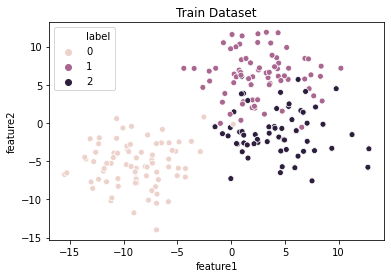

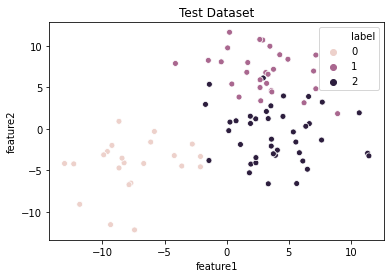

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:2].values, df.iloc[:,2].values, train_size=0.7, test_size=0.3, random_state=42)

#Display X_train
df_xtrain = pd.DataFrame({'feature1': X_train[:,0], 'feature2': X_train[:,1], 'label': y_train[:]})
sns.scatterplot('feature1', 'feature2', data=df_xtrain, hue='label', s=35)
plt.title('Train Dataset')
plt.show()

#Display X_test
df_xtest = pd.DataFrame({'feature1': X_test[:,0], 'feature2': X_test[:,1], 'label': y_test[:]})
sns.scatterplot('feature1', 'feature2', data=df_xtest, hue='label', s=35)
plt.title('Test Dataset')
plt.show()

In [4]:
print(f'Dimension des exemples d\'apprentissage: {X_train.ndim}')
print(f'Nombre d\'exemple d\'apprentissage: {len(X_train)}')
print(f'Nombre de classe d\'apprentissage: {y_train.max() + 1}')
print()
print(f'Dimension des exemples de test: {X_test.ndim}')
print(f'Nombre d\'exemples de test: {len(X_test)}')
print(f'Nombre de classe de test: {y_test.max() + 1}')

Dimension des exemples d'apprentissage: 2
Nombre d'exemple d'apprentissage: 210
Nombre de classe d'apprentissage: 3

Dimension des exemples de test: 2
Nombre d'exemples de test: 90
Nombre de classe de test: 3


## 2)	Algorithme du plus-proche-voisin
a)	Définir un classifieur du (1-)plus-proche-voisin : 
one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')

b)	Le régler sur la base d’apprentissage (fonction fit).

c)	Evaluer le taux de reconnaissance le taux de reconnaissance sur les bases d’apprentissage et de test (fonction score). Déterminer la matrice de confusion.

d)	Afficher les frontières de décision définies par les données d’apprentissage. Vérifier qu’elles correspondent à l’attendu.

e)	Afficher les frontières de décisions et les données de test. Retrouver les erreurs de classification.



In [5]:
from sklearn.neighbors import KNeighborsClassifier
one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
one_NN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

Avec notre base d'entrainement (random_state = 42) qu'on a fit, 

on obtient par la suite un score de 0.8 en testant avec notre base de test. cela signifie que des points sont mal classés 

In [6]:
print('Accuracy on training set:', one_NN.score(X_train, y_train))
print('Accuracy on test set:', one_NN.score(X_test, y_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.8


In [7]:
from sklearn import metrics
Y_pred_test = one_NN.predict(X_test)
metrics.confusion_matrix(y_test, Y_pred_test)

array([[22,  0,  0],
       [ 0, 25,  3],
       [ 2, 13, 25]])

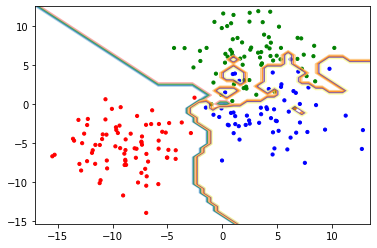

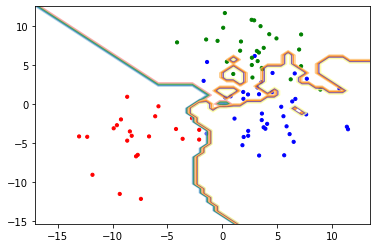

In [8]:
colors = np.array([x for x in 'rgbcmyk'])
X_min, X_max = X[:, 0].min() * 1.1, X[:, 0].max() * 1.1
Y_min, Y_max = X[:, 1].min() * 1.1, X[:, 1].max() * 1.1
X_h = (X_max - X_min)/50
Y_h = (Y_max - Y_min)/50
XX, YY = np.meshgrid(np.arange(X_min, X_max, X_h),
                     np.arange(Y_min, Y_max, Y_h))
Y = one_NN.predict(np.c_[XX.ravel(), YY.ravel()])
Y = Y.reshape(XX.shape)

plt.contour(XX, YY, Y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], cmap=plt.cm.Paired, color=colors[y_train].tolist(), s=10)
plt.xlim(XX.min(), XX.max())
plt.ylim(YY.min(), YY.max())
plt.show()

plt.contour(XX, YY, Y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], cmap=plt.cm.Paired, color=colors[y_test].tolist(), s=10)
plt.xlim(XX.min(), XX.max())
plt.ylim(YY.min(), YY.max())
plt.show()

#### 3)	Analyse du fonctionnement de l’algorithme
a)	On utilise toute la base de test. Générer une base d’apprentissage X_train1 dont la taille varie de 1% à 100% de X_train. Evaluer l’algorithme du ppv sur X_test, en utilisant X_train1. Stocker le taux de reconnaissance. Tracer le graphe (taux de reconnaissance en fonction du nombre d’exemples d’apprentissage). Expliquer l’influence du nombre d’exemples d’apprentissage sur le taux de reconnaissance et le temps de classification.

b)	On utilise toute la base d’apprentissage. Générer une base de test X_test1 dont la taille varie de 1% à 100% de X_test. Evaluer l’algorithme du ppv sur X_test1, en utilisant X_train. Stocker le taux de reconnaissance. Tracer le graphe (taux de reconnaissance en fonction du nombre d’exemples de test). Expliquer l’influence du nombre d’exemples de test sur le taux de reconnaissance.


In [9]:
max_size = X_train.shape[0]
acc = []
pandaSizeTraining = []

for size in range (1, 100):
    X_train1, temp1, y_train1, temp2 = train_test_split(X_train, y_train, train_size=size/100, random_state=42)
    pandaSizeTraining.append(np.shape(X_train1)[0])
    one_NN.fit(X_train1, y_train1)
    acc.append(one_NN.score(X_test, y_test))

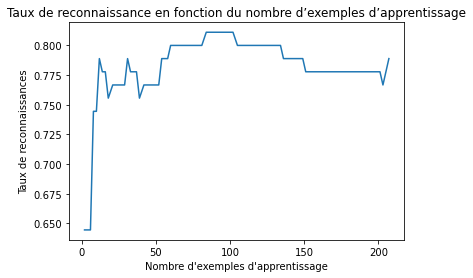

In [10]:
plt.title('Taux de reconnaissance en fonction du nombre d’exemples d’apprentissage')
plt.xlabel('Nombre d\'exemples d\'apprentissage')
plt.ylabel('Taux de reconnaissances')
plt.plot(pandaSizeTraining, acc)
plt.show()

On remarque que plus il y a de nombre d'exemples plus le taux de reconnaissance est meilleur.

De plus, plus le nombre d'exemples d'apprentissage est élevé plus le temps de classification sera élevé. En effet, si nous classions 10% de la base d'entrainement prendra plus de temps que de classer 100% de la base d'entrainement.

In [11]:
max_size = X_train.shape[0]
acc = []
pandaSizeTest = []

one_NN.fit(X_train, y_train)

for size in range (1, 99):
    temp1, X_test1, temp2, y_test1 = train_test_split(X_test, y_test, test_size=size/100, random_state=42)
    pandaSizeTest.append(np.shape(X_test1)[0])
    acc.append(one_NN.score(X_test1, y_test1))

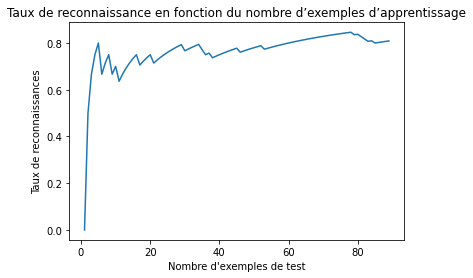

In [12]:
plt.title('Taux de reconnaissance en fonction du nombre d’exemples d’apprentissage')
plt.xlabel('Nombre d\'exemples de test')
plt.ylabel('Taux de reconnaissances')
plt.plot(pandaSizeTest, acc)
plt.show()

Sachant que notre modèle a été entrainé avec la base d'entrainement contenant 210 exemples, la taille de la base de donnée de test n'a pas d'influence sur le taux de reconnaissance. (excepté si notre base de test contient 0 exemple) 



#### 4)	Algorithme des k-ppv
a)	Tester la fonction KNeighborsClassifier en faisant varier le paramètre k de 1 à une valeur maximum kmax choisie judicieusement et justifiée.

b)	Observer l’influence du paramètre k sur le taux d’erreur en test : tracer le graphe (taux de reconnaissance en fonction de k). Donner la valeur optimale k* (qui minimise l’erreur en test) de k.

c)	Afficher les frontières de décision pour :
-	k = 1
-	k = k*
-	k = kmax
Conclure sur l’impact de k sur la forme des frontières et justifier qualitativement la valeur k*.
Dans ces trois situations, que peut-on dire du biais et de la variance ?

d)	Observer l’influence du paramètre k sur le taux d’erreur en apprentissage : tracer le graphe (taux de reconnaissance en fonction de k). 

e)	Le protocole mis en œuvre pour régler le paramètre k est-il satisfaisant ? Justifier votre réponse.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:2].values, df.iloc[:,2].values, train_size=0.7, test_size=0.3, random_state=42)
PandaScoreArray = []
PandOpti = 1
PandaScore = 0

for k in range(1, len(X_train)):
    mega_KNN = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    mega_KNN.fit(X_train, y_train)
    PandaScoreArray.append(mega_KNN.score(X_test, y_test))
    if mega_KNN.score(X_test, y_test) > PandaScore:
        PandaScore = mega_KNN.score(X_test, y_test)
        PandOpti = k
print("K optimal : {} pour un score de {}".format(PandOpti, PandaScore))

K optimal : 33 pour un score de 0.9111111111111111


La valeur maximale kmax est la taille de la base d'entrainement (210 ici)

Nous appliquons judicieusement KNeighborsClassifier pour un nombre de voisin k allant de 1 à 210 (taille de la base d'entrainement) et nous récupérons le k pour lequel le taux de reconnaissance est meilleur. 

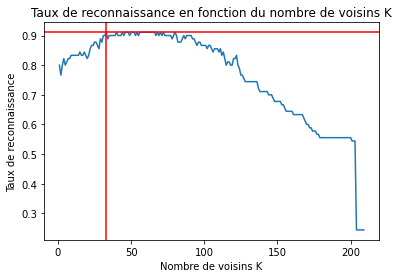

In [14]:
pandaKArray = range(1, len(X_train))

plt.title('Taux de reconnaissance en fonction du nombre de voisins K')
plt.xlabel('Nombre de voisins K')
plt.ylabel('Taux de reconnaissance')
plt.plot(pandaKArray, PandaScoreArray)
plt.axhline(PandaScore, color='r')
plt.axvline(PandOpti, color='r')
plt.show()

K optimal : 33 pour un score de 0.9111111111111111

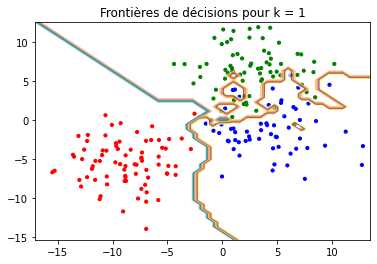

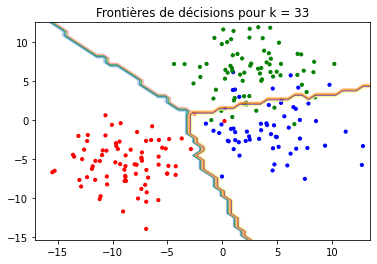

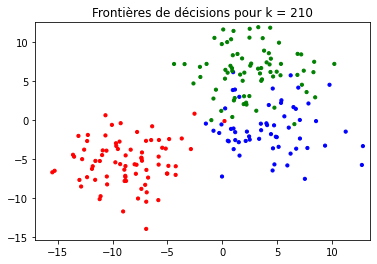

In [15]:
panda_KNN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
panda_KNN.fit(X_train, y_train)

chenille_KNN = KNeighborsClassifier(n_neighbors=PandOpti, algorithm='brute')
chenille_KNN.fit(X_train, y_train)

eddyMalou_KNN = KNeighborsClassifier(n_neighbors=len(X_train), algorithm='brute')
eddyMalou_KNN.fit(X_train, y_train)

#Setup
colors = np.array([x for x in 'rgbcmyk'])
X_min, X_max = X[:, 0].min() * 1.1, X[:, 0].max() * 1.1
Y_min, Y_max = X[:, 1].min() * 1.1, X[:, 1].max() * 1.1
X_h = (X_max - X_min)/50
Y_h = (Y_max - Y_min)/50
XX, YY = np.meshgrid(np.arange(X_min, X_max, X_h),
                     np.arange(Y_min, Y_max, Y_h))

#for k = 1
Y = panda_KNN.predict(np.c_[XX.ravel(), YY.ravel()])
Y = Y.reshape(XX.shape)
plt.contour(XX, YY, Y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], cmap=plt.cm.Paired, color=colors[y_train].tolist(), s=10)
plt.xlim(XX.min(), XX.max())
plt.ylim(YY.min(), YY.max())
plt.title('Frontières de décisions pour k = 1')
plt.show()

#for k = 33
Y = chenille_KNN.predict(np.c_[XX.ravel(), YY.ravel()])
Y = Y.reshape(XX.shape)
plt.contour(XX, YY, Y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], cmap=plt.cm.Paired, color=colors[y_train].tolist(), s=10)
plt.xlim(XX.min(), XX.max())
plt.ylim(YY.min(), YY.max())
plt.title('Frontières de décisions pour k = 33')
plt.show()

#for k = 210
Y = eddyMalou_KNN.predict(np.c_[XX.ravel(), YY.ravel()])
Y = Y.reshape(XX.shape)
plt.contour(XX, YY, Y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], cmap=plt.cm.Paired, color=colors[y_train].tolist(), s=10)
plt.xlim(XX.min(), XX.max())
plt.ylim(YY.min(), YY.max())
plt.title('Frontières de décisions pour k = 210')
plt.show()



k = 1 => variance grande et biais faible (overfitting) car le modèle nous permet de bien distinguer les classes, mais sa généralisation avec les données d'entrainements ne permettent

k = 33 => variance moyenne et biais moyen (Good balance)

k = 210 => variance faible et biais grand (Underfitting) (sur le schéma nous n'observons pas de frontières de décisions car k=210 voisins correspond au nombre total de la base d'entrainement. La classe "rouge" est la seule classe "bien classée")

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:2].values, df.iloc[:,2].values, train_size=0.7, test_size=0.3, random_state=42)
PandaScoreArray = []
PandOpti = 1
PandaScore = 0

for k in range(1, len(X_train)):
    mega_KNN = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    mega_KNN.fit(X_train, y_train)
    PandaScoreArray.append(1 - mega_KNN.score(X_train, y_train))
    if mega_KNN.score(X_train, y_train) > PandaScore:
        PandaScore = mega_KNN.score(X_train, y_train)
        PandOpti = k
print("K optimal : {} pour un score de {}".format(PandOpti, PandaScore))

K optimal : 1 pour un score de 1.0


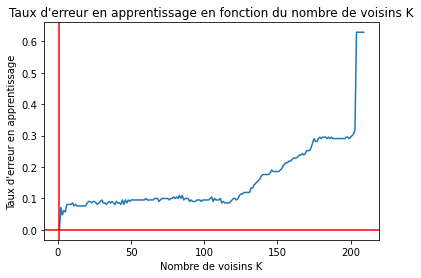

In [17]:
pandaKArray = range(1, len(X_train))

plt.title('Taux d\'erreur en apprentissage en fonction du nombre de voisins K')
plt.xlabel('Nombre de voisins K')
plt.ylabel('Taux d\'erreur en apprentissage')
plt.plot(pandaKArray, PandaScoreArray)
plt.axhline(1-PandaScore, color='r')
plt.axvline(PandOpti, color='r')
plt.show()

Nous remarquons que le taux d'erreur en apprentissage pour k = 1 est le plus optimal et plus k est grand, plus le taux d'erreur 

Le protocol que nous avons mis en oeuvre n'est pas satisfaisant car il est itératif et va tester un nombre de plus proche voisin k allant de 1 à la taille de la base d'entrainement. 

En effet, si la taille de la base d'entrainement est très grande et que nous devions la parcourir entièrement pour tester et trouver le meilleur k optimal.

Une solution optimale serait de tester itérativement le programmet afin de trouver le nombre de plus proche voisin k optimal allant de 1 à la racine carré de la base d'entrainement. Cela permettrait de rendre le processing plus rapide et d'obtenir une valeur optimale de k.